<a href="https://colab.research.google.com/github/Devanshi-123/stock_market_prediction/blob/main/Stock_Market_Prediction(Diversified_Financial).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Stock Market Prediction Using Different Machine Learning And Deep Learning Algorithms**


## **Importing the necessary libraries**

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [219]:
cd /content/drive/My Drive/Stock Market Prediction(Mini Project)

/content/drive/My Drive/Stock Market Prediction(Mini Project)


## **Importing the dataset**

In [220]:
##Metallic Dataset
df=pd.read_csv("Stock_AYEG1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2496 entries, 0 to 2495
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2496 non-null   int64  
 1   <TICKER>      2496 non-null   object 
 2   <DTYYYYMMDD>  2496 non-null   int64  
 3   <FIRST>       2496 non-null   float64
 4   <HIGH>        2496 non-null   float64
 5   <LOW>         2496 non-null   float64
 6   <CLOSE>       2496 non-null   float64
 7   <VALUE>       2496 non-null   int64  
 8   <VOL>         2496 non-null   int64  
 9   <OPENINT>     2496 non-null   int64  
 10  <PER>         2496 non-null   object 
 11  <OPEN>        2496 non-null   float64
 12  <LAST>        2496 non-null   float64
dtypes: float64(6), int64(5), object(2)
memory usage: 253.6+ KB


In [221]:
df.head()

,Unnamed: 0,<TICKER>,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>
0,0,Pardis.Invsetment,20011223,1000.0,1000.0,1000.0,1000.0,1000000,1000,1,D,0.0,1000.0
1,1,Pardis.Invsetment,20020129,1000.0,1000.0,1000.0,1000.0,10000,10,1,D,1000.0,1000.0
2,2,Pardis.Invsetment,20020902,1000.0,1000.0,1000.0,1000.0,1000000,1000,1,D,1000.0,1000.0
3,3,Pardis.Invsetment,20030224,1000.0,1000.0,1000.0,1000.0,2000000,2000,1,D,1000.0,1000.0
4,4,Pardis.Invsetment,20030318,1000.0,1000.0,1000.0,1000.0,50000,50,1,D,1000.0,1000.0


## **Exploratory Data Analysis**

In [222]:
df.describe()

,Unnamed: 0,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<OPEN>,<LAST>
count,2496.000000,2.496000e+03,2496.000000,2496.000000,2496.000000,2496.000000,2.496000e+03,2.496000e+03,2496.000000,2496.000000,2496.000000
mean,1247.500000,2.014363e+07,1422.473958,1440.773237,1396.182692,1417.616587,6.920851e+09,2.606767e+06,245.403846,1412.841747,1417.481571
std,720.677459,3.497205e+04,893.650137,905.768022,868.202003,883.886601,2.500800e+10,7.601022e+06,591.602922,874.045896,887.555199
min,0.000000,2.001122e+07,708.000000,748.000000,702.000000,732.000000,1.042000e+03,1.000000e+00,1.000000,0.000000,721.000000
25%,623.750000,2.012041e+07,1030.000000,1038.750000,1020.000000,1033.000000,7.551238e+07,7.259300e+04,14.000000,1032.000000,1031.000000
50%,1247.500000,2.014567e+07,1141.000000,1153.000000,1122.000000,1139.500000,3.585771e+08,3.225290e+05,45.000000,1138.000000,1139.000000
75%,1871.250000,2.017083e+07,1490.000000,1504.500000,1468.000000,1487.250000,1.929998e+09,1.389884e+06,156.000000,1486.000000,1488.500000
max,2495.000000,2.020060e+07,9255.000000,9255.000000,9255.000000,8978.000000,3.938869e+11,1.953190e+08,9629.000000,8978.000000,9255.000000


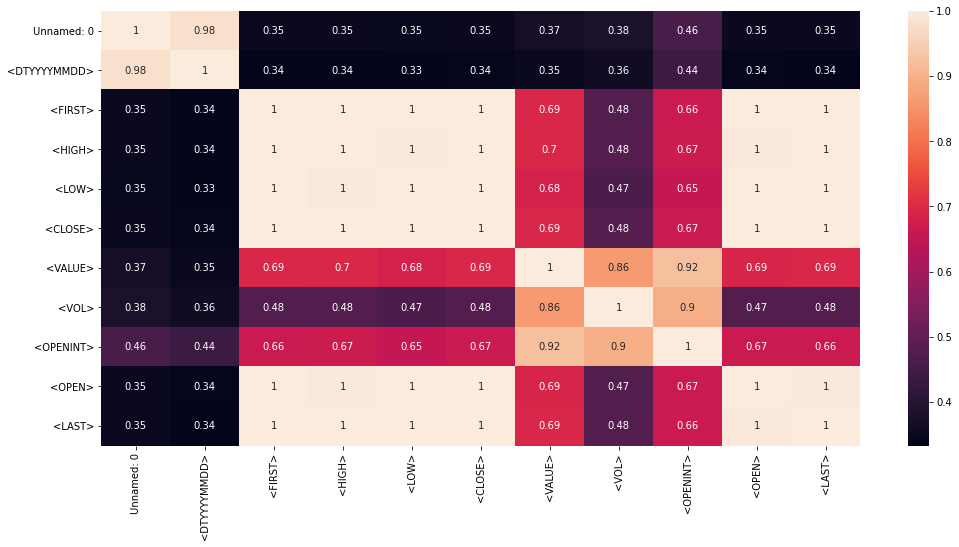

In [223]:
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(df.corr(), annot = True)

In [224]:
df['datetime'] = pd.to_datetime(df['<DTYYYYMMDD>'], format='%Y%m%d')
df.index = df['datetime']
df.dropna()
df_new = df[["<FIRST>","<HIGH>","<LOW>","<CLOSE>","<VALUE>","<VOL>"]]
df_new.head()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>
datetime,,,,,,
2001-12-23,1000.0,1000.0,1000.0,1000.0,1000000,1000
2002-01-29,1000.0,1000.0,1000.0,1000.0,10000,10
2002-09-02,1000.0,1000.0,1000.0,1000.0,1000000,1000
2003-02-24,1000.0,1000.0,1000.0,1000.0,2000000,2000
2003-03-18,1000.0,1000.0,1000.0,1000.0,50000,50


In [225]:
df_new.shape

(2496, 6)

In [226]:
#Calculating the change in price
df_new['change_in_price'] = df_new['<CLOSE>'].diff()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## **Data Visualisation**

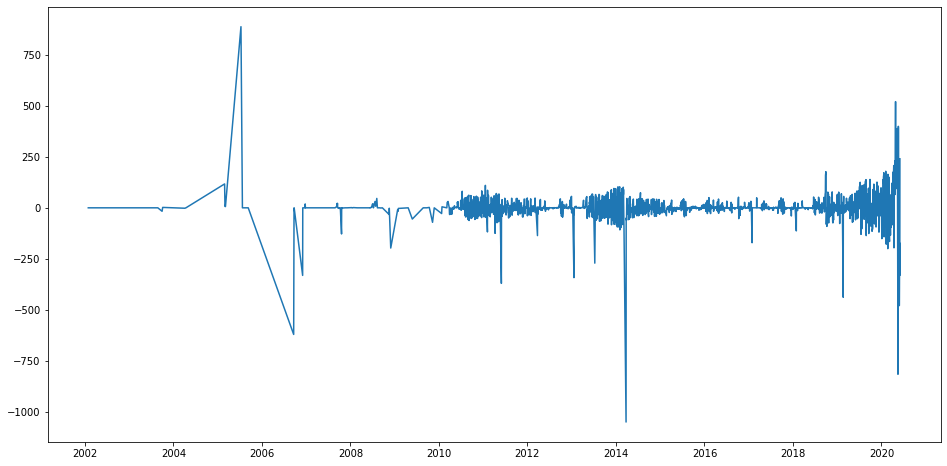

In [227]:
plt.figure(figsize=(16,8))
plt.plot(df_new['change_in_price'], label='Change In Price')

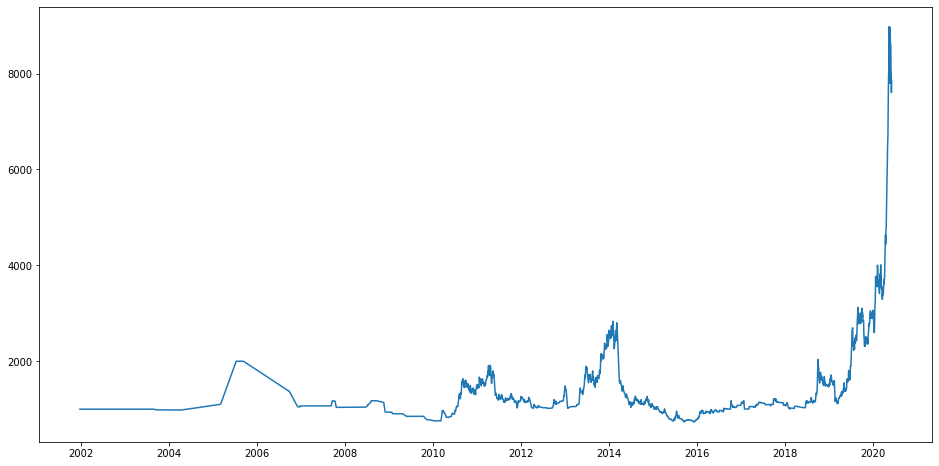

In [228]:
plt.figure(figsize=(16,8))
plt.plot(df_new['<CLOSE>'], label='Close Price history')

## **Calculating the technical indicators**

In [229]:
#1. Simple n day moving average
#A moving average (MA) is a widely used technical indicator that smooths out price trends by filtering out the “noise” from random short-term price fluctuations.
##The most common applications of moving averages are to identify trend direction and to determine support and resistance levels.
def moving_average(df, n):
    """Calculate the moving average for the given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    MA = pd.Series(df['<CLOSE>'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    df = df.join(MA)
    return df
df_new = moving_average(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10
datetime,,,,,,,,
2020-05-26,8190.0,8516.0,8190.0,8587.0,10371275460,1266334,-34.0,8518.1
2020-05-27,8097.0,8300.0,8097.0,8108.0,188257315089,23218666,-479.0,8477.8
2020-05-30,8334.0,8340.0,7703.0,7936.0,235877669098,29722192,-172.0,8389.9
2020-05-31,8000.0,8079.0,7540.0,7605.0,185150285046,24346946,-331.0,8252.6
2020-06-01,7800.0,7985.0,7619.0,7845.0,88286063628,11254209,240.0,8220.8


In [230]:
#2. Weighted Moving Average (WMA)
def weighted_moving_average(df, n):
    """
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    WMA = pd.Series(df['<CLOSE>'].ewm(span=n, min_periods=n).mean(), name='WMA_' + str(n))
    df = df.join(WMA)
    return df
df_new = weighted_moving_average(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10
datetime,,,,,,,,,
2020-05-26,8190.0,8516.0,8190.0,8587.0,10371275460,1266334,-34.0,8518.1,8333.958415
2020-05-27,8097.0,8300.0,8097.0,8108.0,188257315089,23218666,-479.0,8477.8,8292.875067
2020-05-30,8334.0,8340.0,7703.0,7936.0,235877669098,29722192,-172.0,8389.9,8227.988691
2020-05-31,8000.0,8079.0,7540.0,7605.0,185150285046,24346946,-331.0,8252.6,8114.718020
2020-06-01,7800.0,7985.0,7619.0,7845.0,88286063628,11254209,240.0,8220.8,8065.678380


In [231]:
#3. Momentum
def momentum(df, n):
    """
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    M = pd.Series(df['<CLOSE>'].diff(n), name='MOM_' + str(n))
    df = df.join(M)
    return df
df_new = momentum(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10
datetime,,,,,,,,,,
2020-05-26,8190.0,8516.0,8190.0,8587.0,10371275460,1266334,-34.0,8518.1,8333.958415,464.0
2020-05-27,8097.0,8300.0,8097.0,8108.0,188257315089,23218666,-479.0,8477.8,8292.875067,-403.0
2020-05-30,8334.0,8340.0,7703.0,7936.0,235877669098,29722192,-172.0,8389.9,8227.988691,-879.0
2020-05-31,8000.0,8079.0,7540.0,7605.0,185150285046,24346946,-331.0,8252.6,8114.718020,-1373.0
2020-06-01,7800.0,7985.0,7619.0,7845.0,88286063628,11254209,240.0,8220.8,8065.678380,-318.0


In [232]:
#4. Stochastic K%
def stochastic_oscillator_k(df):
    """Calculate stochastic oscillator %K for given data.
    :param df: pandas.DataFrame
    :return: pandas.DataFrame
    """
    SOk = pd.Series((df['<CLOSE>'] - df['<LOW>']) / (df['<HIGH>'] - df['<LOW>']), name='SO_k')
    df = df.join(SOk)
    return df
df_new = stochastic_oscillator_k(df_new)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k
datetime,,,,,,,,,,,
2020-05-26,8190.0,8516.0,8190.0,8587.0,10371275460,1266334,-34.0,8518.1,8333.958415,464.0,1.217791
2020-05-27,8097.0,8300.0,8097.0,8108.0,188257315089,23218666,-479.0,8477.8,8292.875067,-403.0,0.054187
2020-05-30,8334.0,8340.0,7703.0,7936.0,235877669098,29722192,-172.0,8389.9,8227.988691,-879.0,0.365777
2020-05-31,8000.0,8079.0,7540.0,7605.0,185150285046,24346946,-331.0,8252.6,8114.718020,-1373.0,0.120594
2020-06-01,7800.0,7985.0,7619.0,7845.0,88286063628,11254209,240.0,8220.8,8065.678380,-318.0,0.617486


In [233]:
#5. Stochastic D%
def stochastic_oscillator_d(df, n):
    """Calculate stochastic oscillator %D for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    SOk = pd.Series((df['<CLOSE>'] - df['<LOW>']) / (df['<HIGH>'] - df['<LOW>']), name='SO%k')
    SOd = pd.Series(SOk.ewm(span=n, min_periods=n).mean(), name='SO_' + str(n))
    df = df.join(SOd)
    return df
df_new = stochastic_oscillator_d(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10
datetime,,,,,,,,,,,,
2020-05-26,8190.0,8516.0,8190.0,8587.0,10371275460,1266334,-34.0,8518.1,8333.958415,464.0,1.217791,0.741580
2020-05-27,8097.0,8300.0,8097.0,8108.0,188257315089,23218666,-479.0,8477.8,8292.875067,-403.0,0.054187,0.594541
2020-05-30,8334.0,8340.0,7703.0,7936.0,235877669098,29722192,-172.0,8389.9,8227.988691,-879.0,0.365777,0.547128
2020-05-31,8000.0,8079.0,7540.0,7605.0,185150285046,24346946,-331.0,8252.6,8114.718020,-1373.0,0.120594,0.460918
2020-06-01,7800.0,7985.0,7619.0,7845.0,88286063628,11254209,240.0,8220.8,8065.678380,-318.0,0.617486,0.491934


In [234]:
#6. Relative Strength Index
#Error
"""
def relative_strength_index(df, n):
    Calculate Relative Strength Index(RSI) for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    i = df.index[0]
    UpI = [0]
    DoI = [0]
    while i + 1 <= df.index[-1]:
        UpMove = float(df.loc[i + 1, 'high']) - float(df.loc[i, 'high'])
        DoMove = float(df.loc[i, 'low']) - float(df.loc[i + 1, 'low'])
        if UpMove > DoMove and UpMove > 0:
            UpD = UpMove
        else:
            UpD = 0
        UpI.append(UpD)
        if DoMove > UpMove and DoMove > 0:
            DoD = DoMove
        else:
            DoD = 0
        DoI.append(DoD)
        i = i + 1
    UpI = pd.Series(UpI)

    DoI = pd.Series(DoI)
    PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())
    NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())

    # rsi = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))
    rsi = pd.DataFrame(PosDI / (PosDI + NegDI), columns=['RSI_' + str(n)])
    rsi = rsi.set_index(df.index)
    df = df.join(rsi)
    return df
"""

"\ndef relative_strength_index(df, n):\n    Calculate Relative Strength Index(RSI) for given data.\n    :param df: pandas.DataFrame\n    :param n:\n    :return: pandas.DataFrame\n    i = df.index[0]\n    UpI = [0]\n    DoI = [0]\n    while i + 1 <= df.index[-1]:\n        UpMove = float(df.loc[i + 1, 'high']) - float(df.loc[i, 'high'])\n        DoMove = float(df.loc[i, 'low']) - float(df.loc[i + 1, 'low'])\n        if UpMove > DoMove and UpMove > 0:\n            UpD = UpMove\n        else:\n            UpD = 0\n        UpI.append(UpD)\n        if DoMove > UpMove and DoMove > 0:\n            DoD = DoMove\n        else:\n            DoD = 0\n        DoI.append(DoD)\n        i = i + 1\n    UpI = pd.Series(UpI)\n\n    DoI = pd.Series(DoI)\n    PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())\n    NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())\n\n    # rsi = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))\n    rsi = pd.DataFrame(PosDI / (PosDI + NegDI), columns=['R

In [235]:
#7. Signal
def macd(df, n_fast, n_slow):
    """Calculate MACD, MACD Signal and MACD difference
    :param df: pandas.DataFrame
    :param n_fast:
    :param n_slow:
    :return: pandas.DataFrame
    """
    EMAfast = pd.Series(df['<CLOSE>'].ewm(span=n_fast, min_periods=n_slow).mean())
    EMAslow = pd.Series(df['<CLOSE>'].ewm(span=n_slow, min_periods=n_slow).mean())
    MACD = pd.Series(EMAfast - EMAslow, name='MACD_' + str(n_fast) + '_' + str(n_slow))
    MACDsign = pd.Series(MACD.ewm(span=9, min_periods=9).mean(), name='MACDsign_' + str(n_fast) + '_' + str(n_slow))
    MACDdiff = pd.Series(MACD - MACDsign, name='MACDdiff_' + str(n_fast) + '_' + str(n_slow))
    df = df.join(MACD)
    df = df.join(MACDsign)
    df = df.join(MACDdiff)
    return df
df_new = macd(df_new,12,26)
df_new.head()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26
datetime,,,,,,,,,,,,,,,
2001-12-23,1000.0,1000.0,1000.0,1000.0,1000000,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-29,1000.0,1000.0,1000.0,1000.0,10000,10,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-09-02,1000.0,1000.0,1000.0,1000.0,1000000,1000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-02-24,1000.0,1000.0,1000.0,1000.0,2000000,2000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-03-18,1000.0,1000.0,1000.0,1000.0,50000,50,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [236]:
#8. Larry Williams R%
#lEFT

In [237]:
#9. Accumulation / Distribution
def accumulation_distribution(df, n):
    """Calculate Accumulation/Distribution for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    ad = (2 * df['<CLOSE>'] - df['<HIGH>'] - df['<LOW>']) / (df['<HIGH>'] - df['<LOW>']) * df['<VOL>']
    M = ad.diff(n - 1)
    N = ad.shift(n - 1)
    ROC = M / N
    AD = pd.Series(ROC, name='Acc/Dist_ROC_' + str(n))
    df = df.join(AD)
    return df
df_new = accumulation_distribution(df_new,10)
df_new.tail()

/usr/local/lib/python3.6/dist-packages/pandas/core/algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,Acc/Dist_ROC_10
datetime,,,,,,,,,,,,,,,,
2020-05-26,8190.0,8516.0,8190.0,8587.0,10371275460,1266334,-34.0,8518.1,8333.958415,464.0,1.217791,0.741580,936.098913,973.276660,-37.177747,NaN
2020-05-27,8097.0,8300.0,8097.0,8108.0,188257315089,23218666,-479.0,8477.8,8292.875067,-403.0,0.054187,0.594541,858.789162,950.379160,-91.589998,NaN
2020-05-30,8334.0,8340.0,7703.0,7936.0,235877669098,29722192,-172.0,8389.9,8227.988691,-879.0,0.365777,0.547128,774.711276,915.245584,-140.534308,NaN
2020-05-31,8000.0,8079.0,7540.0,7605.0,185150285046,24346946,-331.0,8252.6,8114.718020,-1373.0,0.120594,0.460918,673.605111,866.917489,-193.312378,3.756763
2020-06-01,7800.0,7985.0,7619.0,7845.0,88286063628,11254209,240.0,8220.8,8065.678380,-318.0,0.617486,0.491934,605.859767,814.705945,-208.846178,-1.068315


In [238]:
#10. Commodity Channel Index
def commodity_channel_index(df, n):
    """Calculate Commodity Channel Index for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    PP = (df['<HIGH>'] + df['<LOW>'] + df['<CLOSE>']) / 3
    CCI = pd.Series((PP - PP.rolling(n, min_periods=n).mean()) / PP.rolling(n, min_periods=n).std(),
                    name='CCI_' + str(n))
    df = df.join(CCI)
    return df
df_new = commodity_channel_index(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,Acc/Dist_ROC_10,CCI_10
datetime,,,,,,,,,,,,,,,,,
2020-05-26,8190.0,8516.0,8190.0,8587.0,10371275460,1266334,-34.0,8518.1,8333.958415,464.0,1.217791,0.741580,936.098913,973.276660,-37.177747,NaN,-0.256277
2020-05-27,8097.0,8300.0,8097.0,8108.0,188257315089,23218666,-479.0,8477.8,8292.875067,-403.0,0.054187,0.594541,858.789162,950.379160,-91.589998,NaN,-0.800125
2020-05-30,8334.0,8340.0,7703.0,7936.0,235877669098,29722192,-172.0,8389.9,8227.988691,-879.0,0.365777,0.547128,774.711276,915.245584,-140.534308,NaN,-1.003493
2020-05-31,8000.0,8079.0,7540.0,7605.0,185150285046,24346946,-331.0,8252.6,8114.718020,-1373.0,0.120594,0.460918,673.605111,866.917489,-193.312378,3.756763,-1.435668
2020-06-01,7800.0,7985.0,7619.0,7845.0,88286063628,11254209,240.0,8220.8,8065.678380,-318.0,0.617486,0.491934,605.859767,814.705945,-208.846178,-1.068315,-1.031068


In [239]:
df_new.mean()

<FIRST>            1.422474e+03
<HIGH>             1.440773e+03
<LOW>              1.396183e+03
<CLOSE>            1.417617e+03
<VALUE>            6.920851e+09
<VOL>              2.606767e+06
change_in_price    2.743487e+00
MA_10              1.406251e+03
WMA_10             1.406375e+03
MOM_10             2.905873e+01
SO_k                        NaN
SO_10              4.953993e-01
MACD_12_26         1.606395e+01
MACDsign_12_26     1.481071e+01
MACDdiff_12_26     1.388410e+00
Acc/Dist_ROC_10             NaN
CCI_10             7.574129e-02
dtype: float64

In [240]:
df_new.min()

<FIRST>             708.000000
<HIGH>              748.000000
<LOW>               702.000000
<CLOSE>             732.000000
<VALUE>            1042.000000
<VOL>                 1.000000
change_in_price   -1049.000000
MA_10               742.500000
WMA_10              743.364292
MOM_10            -1373.000000
SO_k                      -inf
SO_10               -10.499717
MACD_12_26         -275.745186
MACDsign_12_26     -251.258879
MACDdiff_12_26     -208.846178
Acc/Dist_ROC_10           -inf
CCI_10               -2.846050
dtype: float64

In [241]:
df_new.max()

<FIRST>            9.255000e+03
<HIGH>             9.255000e+03
<LOW>              9.255000e+03
<CLOSE>            8.978000e+03
<VALUE>            3.938869e+11
<VOL>              1.953190e+08
change_in_price    8.870000e+02
MA_10              8.518100e+03
WMA_10             8.333958e+03
MOM_10             2.701000e+03
SO_k                        inf
SO_10              1.413943e+01
MACD_12_26         1.144436e+03
MACDsign_12_26     9.851170e+02
MACDdiff_12_26     2.253252e+02
Acc/Dist_ROC_10             inf
CCI_10             2.828932e+00
dtype: float64

In [242]:
df_new.std()

<FIRST>            8.936501e+02
<HIGH>             9.057680e+02
<LOW>              8.682020e+02
<CLOSE>            8.838866e+02
<VALUE>            2.500800e+10
<VOL>              7.601022e+06
change_in_price    6.123000e+01
MA_10              8.325634e+02
WMA_10             8.293433e+02
MOM_10             2.533848e+02
SO_k                        NaN
SO_10              9.967414e-01
MACD_12_26         1.026761e+02
MACDsign_12_26     9.396549e+01
MACDdiff_12_26     2.372482e+01
Acc/Dist_ROC_10             NaN
CCI_10             1.215484e+00
dtype: float64

## **Normalizing Data**

In [243]:
data = (df_new - df_new.mean()) / (df_new.max() - df_new.min())
data.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,Acc/Dist_ROC_10,CCI_10
datetime,,,,,,,,,,,,,,,,,
2020-05-26,0.791801,0.831695,0.794320,0.869438,0.008760,-0.006863,-0.018979,0.914637,0.912654,0.106760,NaN,0.009991,0.647829,0.775222,-0.088827,NaN,-0.058506
2020-05-27,0.780920,0.806304,0.783446,0.811349,0.460377,0.105529,-0.248834,0.909454,0.907241,-0.106053,NaN,0.004024,0.593393,0.756702,-0.214151,NaN,-0.154338
2020-05-30,0.808649,0.811006,0.737381,0.790490,0.581275,0.138826,-0.090260,0.898149,0.898693,-0.222891,NaN,0.002099,0.534190,0.728286,-0.326882,NaN,-0.190174
2020-05-31,0.769571,0.780325,0.718323,0.750350,0.452489,0.111306,-0.172388,0.880491,0.883770,-0.344148,NaN,-0.001399,0.462998,0.689197,-0.448442,NaN,-0.266328
2020-06-01,0.746171,0.769276,0.727560,0.779455,0.206570,0.044273,0.122550,0.876402,0.877310,-0.085189,NaN,-0.000141,0.415296,0.646968,-0.484220,NaN,-0.195033


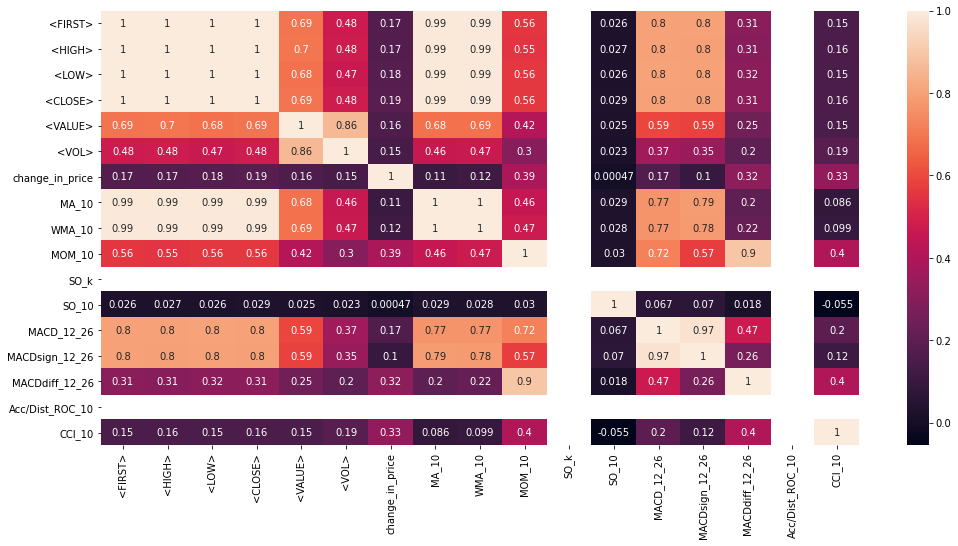

In [244]:
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(data.corr(), annot = True)

In [245]:
#To check null values
data.isnull().sum()

<FIRST>               0
<HIGH>                0
<LOW>                 0
<CLOSE>               0
<VALUE>               0
<VOL>                 0
change_in_price       1
MA_10                 9
WMA_10                9
MOM_10               10
SO_k               2496
SO_10                25
MACD_12_26           25
MACDsign_12_26       33
MACDdiff_12_26       33
Acc/Dist_ROC_10    2496
CCI_10                9
dtype: int64

In [246]:
#Removing the null values
data = data.fillna(data.mean())

In [247]:
data = data.dropna(how="all",axis=1)

In [248]:
##Defining the features and labels
X = data.iloc[:,7:]
X.tail()

,MA_10,WMA_10,MOM_10,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,CCI_10
datetime,,,,,,,,
2020-05-26,0.914637,0.912654,0.106760,0.009991,0.647829,0.775222,-0.088827,-0.058506
2020-05-27,0.909454,0.907241,-0.106053,0.004024,0.593393,0.756702,-0.214151,-0.154338
2020-05-30,0.898149,0.898693,-0.222891,0.002099,0.534190,0.728286,-0.326882,-0.190174
2020-05-31,0.880491,0.883770,-0.344148,-0.001399,0.462998,0.689197,-0.448442,-0.266328
2020-06-01,0.876402,0.877310,-0.085189,-0.000141,0.415296,0.646968,-0.484220,-0.195033


In [249]:
Y = data.iloc[:,3]
Y.tail()

datetime
2020-05-26    0.869438
2020-05-27    0.811349
2020-05-30    0.790490
2020-05-31    0.750350
2020-06-01    0.779455
Name: <CLOSE>, dtype: float64

In [250]:
X.isnull().sum()

MA_10             0
WMA_10            0
MOM_10            0
SO_10             0
MACD_12_26        0
MACDsign_12_26    0
MACDdiff_12_26    0
CCI_10            0
dtype: int64

## Visualising the technical indicators i.e. our features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f972a901940>,
      dtype=object)

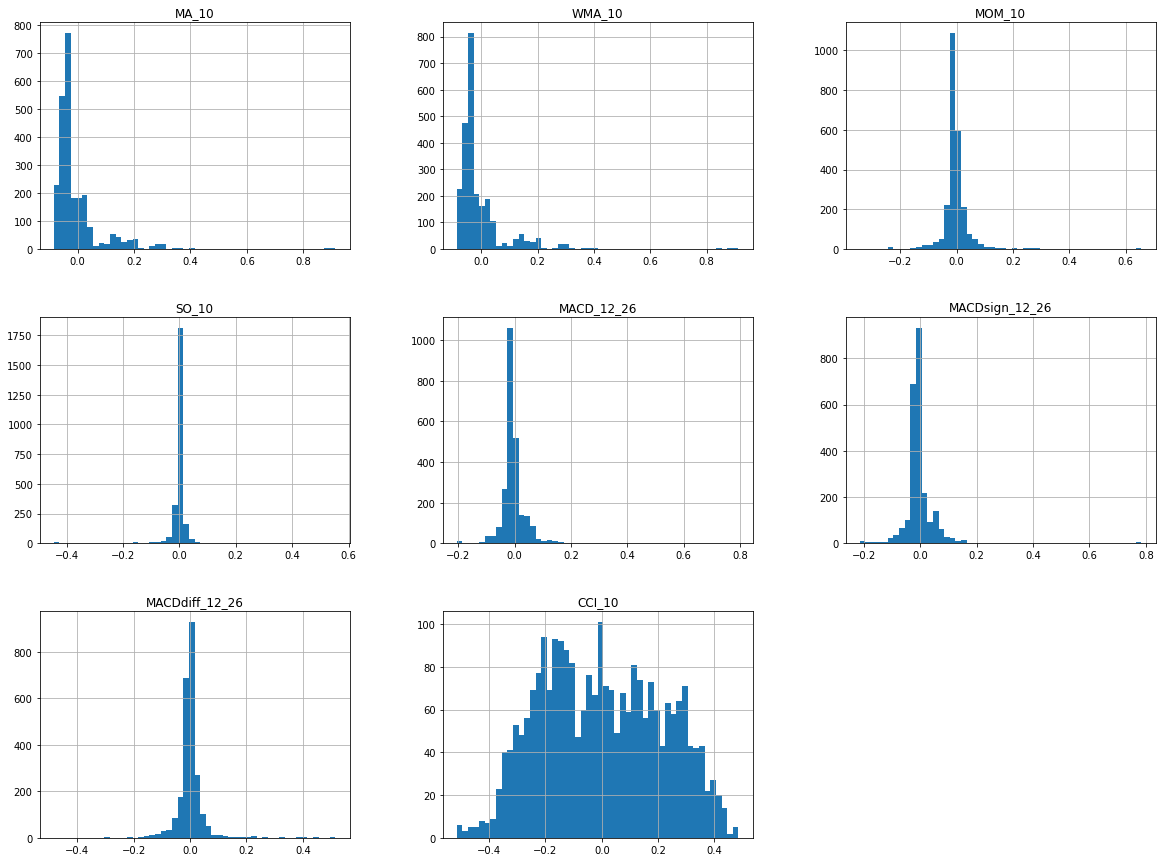

In [251]:
X.hist(bins=50,figsize=(20,15))

In [252]:
#Splitting data into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1,random_state = 0)

# Predicting using Decision Trees

In [253]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
Regressor = DecisionTreeRegressor(max_depth=10)
Regressor.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

## Evaluating the Model

In [254]:
y_pred = Regressor.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
rmse

0.012402581850193226

# Using Bagging Regressor

In [255]:
#import necessary libraries
from sklearn.ensemble import BaggingRegressor

In [256]:
regr = BaggingRegressor(base_estimator=Regressor,
n_estimators=50, random_state=0)
regr.fit(x_train,y_train)
    

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=10,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=Tru

## Evaluating Bagging Regressor

In [257]:
y_pred_br = regr.predict(x_test)

In [258]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test,y_pred_br)
rmse = np.sqrt(mse)
rmse

0.006677556330669477

# Using Random Forest

In [259]:
#importing the libraries
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50,max_depth=10,random_state=1)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

## Evaluating Random Forest

In [260]:
y_pred_rf = rf.predict(x_test)


In [261]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test,y_pred_rf)
rmse = np.sqrt(mse)
rmse

0.007150005327828529

 ## Using AdaBoost Regressor

In [262]:
#importing necessary libraries
from sklearn.ensemble import AdaBoostRegressor
adb_reg = AdaBoostRegressor(base_estimator=Regressor,n_estimators=100,learning_rate=0.1)
adb_reg.fit(x_train,y_train)



AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=10,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                 

## Evaluating AdaBoost Regressor

In [263]:
y_pred_adb = adb_reg.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test,y_pred_adb)
rmse = np.sqrt(mse)
rmse

0.006720856221108317

## Using Gradient Boosting

In [264]:
#importing necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
gdbt = GradientBoostingRegressor(max_depth=10,learning_rate=0.1,n_estimators=50,random_state=1)
gdbt.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## Evaluating gradient boosting

In [265]:
y_pred_gdbt = gdbt.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test,y_pred_gdbt)
rmse = np.sqrt(mse)
rmse

0.008869627229871663

## Using XGBoost

In [266]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

##Using Deep Learning Models

In [267]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Training and testing set

In [268]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1,random_state = 0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2246, 8) (250, 8) (2246,) (250,)


In [269]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X_train_scaled = sc.fit_transform(x_train)

In [270]:
X_train, Y_train = np.array(x_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Using ANN

### Importing Libraries

In [271]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import keras 
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.metrics import confusion_matrix 

### Building the ANN Model


In [272]:
classifier = Sequential() 
classifier.add(Dense(units=50,activation = "relu",input_shape = (X_train.shape[1], 1))) 
classifier.add(Dense(units=50,activation = "relu")) 
classifier.add(Dense(activation = "sigmoid", units = 1)) 
classifier.compile(optimizer = 'adam' , loss = 'mean_squared_error' ) 

In [273]:
classifier.fit(X_train, Y_train, epochs = 15, batch_size = 32)

Epoch 1/15
71/71 [==============================] - 0s 1ms/step - loss: 0.1535
Epoch 2/15
71/71 [==============================] - 0s 1ms/step - loss: 0.0165
Epoch 3/15
71/71 [==============================] - 0s 1ms/step - loss: 0.0111
Epoch 4/15
71/71 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 5/15
71/71 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 6/15
71/71 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 7/15
71/71 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 8/15
71/71 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 9/15
71/71 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 10/15
71/71 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 11/15
71/71 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 12/15
71/71 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 13/15
71/71 [==============================

In [274]:
X_test = np.array(x_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
predicted_stock_price = classifier.predict(X_test)

In [275]:
real_stock_price = np.asarray(y_test)
# real_stock_price=real_stock_price.reshape(1167,1)

In [276]:
predicted_stock_price

array([[[0.03578991],
        [0.04023281],
        [0.01399603],
        ...,
        [0.00287214],
        [0.02399677],
        [0.17018104]],

       [[0.00272536],
        [0.00270769],
        [0.00510222],
        ...,
        [0.00417534],
        [0.00497469],
        [0.26452452]],

       [[0.01887557],
        [0.01401004],
        [0.00073868],
        ...,
        [0.0020791 ],
        [0.00052127],
        [0.00110954]],

       ...,

       [[0.0031234 ],
        [0.00310484],
        [0.00460911],
        ...,
        [0.00396943],
        [0.00489435],
        [0.00071985]],

       [[0.0033201 ],
        [0.00326911],
        [0.00578317],
        ...,
        [0.00380293],
        [0.00664634],
        [0.05830723]],

       [[0.00315264],
        [0.00306624],
        [0.00316933],
        ...,
        [0.00466415],
        [0.00304833],
        [0.00057846]]], dtype=float32)

In [277]:
real_stock_price

array([ 0.16655147, -0.05355525,  0.02042001,  0.00768656, -0.02978615,
        0.04625072,  0.04612945, -0.04688535, -0.07926468, -0.02020575,
        0.02466449,  0.01860095, -0.0245715 ,  0.00319954,  0.13065528,
       -0.04239832, -0.03681986, -0.03815384, -0.0445812 , -0.03136267,
        0.25883864, -0.00177257,  0.16582384,  0.11161574, -0.03027123,
       -0.0596188 , -0.03196903, -0.03924528, -0.05779973, -0.04797679,
       -0.02602675, -0.05282762,  0.04358276, -0.06119532,  0.03958082,
       -0.04445993, -0.03863893, -0.04106434, -0.0454301 , -0.0320903 ,
       -0.02384387, -0.01741652,  0.18195288, -0.04591518, -0.04021545,
        0.13077655, -0.0483406 , -0.05440415, -0.04421739, -0.03306046,
       -0.02639056, -0.04009418, -0.04591518,  0.30285998,  0.00283573,
        0.02042001, -0.02311625,  0.1009439 , -0.07841579, -0.02105464,
        0.17043214, -0.03342428, -0.00116621, -0.03269665, -0.04409612,
       -0.01596126, -0.06677378, -0.02445023, -0.08132629, -0.04

In [278]:
""" plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction Using ANN')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price')
plt.legend()
plt.show() """ #error

" plt.figure(figsize=(20,10))\nplt.plot(real_stock_price, color = 'green', label = 'Stock Price')\nplt.plot(predicted_stock_price, color = 'red', label = 'Predicted Stock Price')\nplt.title('Stock Price Prediction Using ANN')\nplt.xlabel('Trading Day')\nplt.ylabel('Stock Price')\nplt.legend()\nplt.show() "

## Using LSTM

### Importing libraries

In [279]:
pip install nsepy

In [280]:
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Building the LSTM

In [281]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

### Compiling and training the model defined in the above step.
(Iteratively, we can increase or decrease the epochs and batch size to get more accuracy.)

In [282]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, epochs = 15, batch_size = 32)

Epoch 1/15
71/71 [==============================] - 1s 17ms/step - loss: 0.0028
Epoch 2/15
71/71 [==============================] - 1s 18ms/step - loss: 4.2202e-04
Epoch 3/15
71/71 [==============================] - 1s 18ms/step - loss: 4.3559e-04
Epoch 4/15
71/71 [==============================] - 1s 19ms/step - loss: 4.6036e-04
Epoch 5/15
71/71 [==============================] - 1s 18ms/step - loss: 3.7331e-04
Epoch 6/15
71/71 [==============================] - 1s 18ms/step - loss: 5.0660e-04
Epoch 7/15
71/71 [==============================] - 1s 18ms/step - loss: 4.8104e-04
Epoch 8/15
71/71 [==============================] - 1s 18ms/step - loss: 3.5701e-04
Epoch 9/15
71/71 [==============================] - 1s 18ms/step - loss: 4.8745e-04
Epoch 10/15
71/71 [==============================] - 1s 18ms/step - loss: 4.4222e-04
Epoch 11/15
71/71 [==============================] - 1s 18ms/step - loss: 6.5154e-04
Epoch 12/15
71/71 [==============================] - 1s 18ms/step - loss: 2.73

In [283]:
X_test = np.array(x_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)

In [284]:
real_stock_price = np.asarray(y_test)
# real_stock_price=real_stock_price.reshape(1167,1)

In [285]:
predicted_stock_price

array([[ 1.63839832e-01],
       [-5.87661602e-02],
       [ 4.97394521e-03],
       [ 1.99130271e-03],
       [-3.86654995e-02],
       [ 4.02389355e-02],
       [ 3.97091657e-02],
       [-5.74104749e-02],
       [-8.51452574e-02],
       [-2.36933269e-02],
       [ 1.86425578e-02],
       [ 1.41738374e-02],
       [-2.59441100e-02],
       [-4.94934293e-03],
       [ 1.37245640e-01],
       [-6.54014871e-02],
       [-3.99628133e-02],
       [-4.12085243e-02],
       [-5.64490557e-02],
       [-4.48485650e-02],
       [ 2.75412261e-01],
       [-7.83673767e-03],
       [ 1.91637427e-01],
       [ 1.24102078e-01],
       [-3.74108851e-02],
       [-5.82707264e-02],
       [-1.88081246e-02],
       [-5.11601642e-02],
       [-6.42815083e-02],
       [-5.48199527e-02],
       [-2.78260838e-02],
       [-5.40858358e-02],
       [ 3.59513946e-02],
       [-6.61342070e-02],
       [ 5.23741171e-02],
       [-5.46039119e-02],
       [-4.43520732e-02],
       [-4.37384173e-02],
       [-5.0

In [286]:
real_stock_price

array([ 0.16655147, -0.05355525,  0.02042001,  0.00768656, -0.02978615,
        0.04625072,  0.04612945, -0.04688535, -0.07926468, -0.02020575,
        0.02466449,  0.01860095, -0.0245715 ,  0.00319954,  0.13065528,
       -0.04239832, -0.03681986, -0.03815384, -0.0445812 , -0.03136267,
        0.25883864, -0.00177257,  0.16582384,  0.11161574, -0.03027123,
       -0.0596188 , -0.03196903, -0.03924528, -0.05779973, -0.04797679,
       -0.02602675, -0.05282762,  0.04358276, -0.06119532,  0.03958082,
       -0.04445993, -0.03863893, -0.04106434, -0.0454301 , -0.0320903 ,
       -0.02384387, -0.01741652,  0.18195288, -0.04591518, -0.04021545,
        0.13077655, -0.0483406 , -0.05440415, -0.04421739, -0.03306046,
       -0.02639056, -0.04009418, -0.04591518,  0.30285998,  0.00283573,
        0.02042001, -0.02311625,  0.1009439 , -0.07841579, -0.02105464,
        0.17043214, -0.03342428, -0.00116621, -0.03269665, -0.04409612,
       -0.01596126, -0.06677378, -0.02445023, -0.08132629, -0.04

### Plotting the results

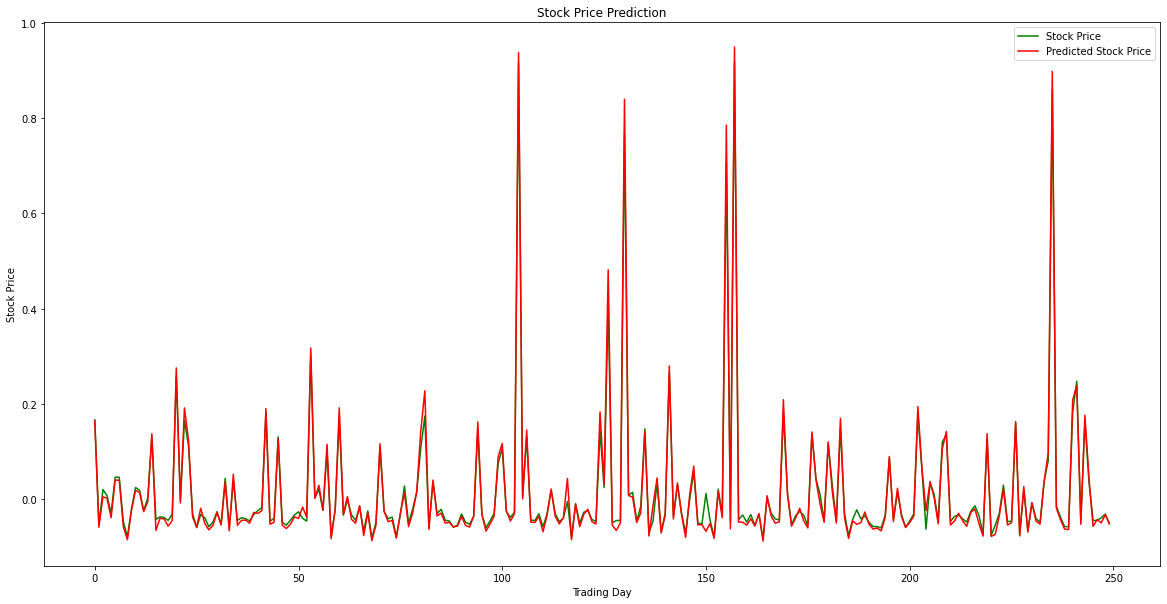

In [287]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [288]:
from sklearn.metrics import mean_squared_error as MSE
rmse = MSE(real_stock_price,predicted_stock_price)**(1/2)
rmse

0.01471334736202281